# Assignment #0 - Data and Visualization

# Introduction

* In this assignment, I will be dealing with how to read, normalize, visualize and pre-process the data.
* I will be using pandas, numpy, matplotlib to read, preprocess and visualize the data.
* In this assignment I have choosen two different datasets. One is used for regression analysis(continuous value) and other one is for classification analysis(discrete values).
* At the end of this notebook, we can learn the importance of pre-processing and visualization of data.

# Review	

## Linear Algebra

* I have reviewed many concepts of Linear Algebra and summarising them.
* Multiplication of two matrices A and B can be done only if A must have the same number of columns as B has rows.
* Matrix multiplication is not commutative and some important properties of matrices are
     A^T(B) = B^T(A)
    ,(AB)^T = B^T(A^T)
* Inverse of a matrix is possible only for square matrix and is defined as I = A^(-1)(A) = A(A^(-1)).
* A set ofvectors islinearly independent if no vector in the set is a linear combination of the other vectors.
* The size of the matrix is called norm. The common way to measure the size of a vector is using the squared L2norm, which can be calculated simply as (x^T)(x).
* An eigenvector of a square matrix A is a nonzero vector v such that multiplication by A alters only the scale of v:
        Av = λv.
  The scalar λ is known as the eigenvalue corresponding to this eigenvector.
* The eigendecomposition of A is then given by A = V diag(λ)V−1 where V is the matrix formed by eigenvectors.
* The singular value decomposition is similar, except this time we will writeAas a product of three matrices:
        A = (U)(D)(V^T)
   Suppose that A is an m×n matrix. Then U is deﬁned to be an m×m matrix,D to be an m×n matrix, and V to be an n×n matrix. The matrices U and V are both deﬁned to be orthogonal matrices. The matrix D is deﬁned to be a diagonal matrix. 
* Principal Components Analysis(PCA) can be derived using only knowledge of basic linear algebra. Suppose we have a collection of m points {x(1), . . . , x(m)} in R^n and we want to apply lossy compression to these points. Lossy compression means storing the points in a way that requires less memory but may lose some precision. We want to lose as little precision as possible. 
   we can encode these points is to represent a lower-dimensional version of them. We will want to ﬁnd some encoding function that produces the codefor an input,f(x) =c, and a decoding function that produces the reconstructedinput given its code, x ≈ g(f(x)). We need to decrease the cost between input point x and its reconstruction function g(c∗). After solving the function we will get 
                               f(x) = (D^T)x. 

## Probability Theory

* A random variable is a variable that can take on diﬀerent values randomly. Random variables may be discrete or continuous
* Aprobability distributionis a description of how likely a random variable orset of random variables is to take on each of its possible states.
* A probability distribution over discrete variables may be described using aproba-bility mass function(PMF).
* When working with continuous random variables, we describe probability distri-butions using a probability density function (PDF) rather than a probabilitymass function.
* The probabilitydistribution over the subset is known as themarginal probability distribution.
* The probability of some event, given that someother event has happened is called aconditional probability.
* Two random variables x and y are independent if their probability distributioncan be expressed as a product of two factors, one involving only x and one involving only 
            y:∀x ∈ x, y ∈ y, p(x = x, y = y) = p(x = x)p(y = y).
* The most commonly used distribution over real numbers is thenormal distribu-tion, also known as the Gaussian distribution.
* If we also know P(x), we can compute the desired quantity using Bayes’ rule: P (x | y) =P (x)P (y | x)P (y).
* When we represent the factorization of a probabilitydistribution with a graph, we call it astructured probabilistic model, or graphical model.

## Introduction of data for regression & source

* The features in this dataset is about all the block groups in California from the 1990 Census. 
* In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. 
* Naturally, the geographical area included varies inversely with the population density. 
* We computed distances among the centroids of each block group as measured in latitude and longitude. 
* We excluded all the block groups reporting zero entries for the independent and dependent variables. 
* The final data contained 20,640 observations on 9 variables. 
* The dependent variable is median house value.

# Data

## Reading the Regression Dataset

In [8]:
import pandas as pd
f = pd.read_csv("cali_housing.csv")
f.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Normalizing the Regression dataset

In [9]:
for i in range(8):
    max_ = f.iloc[:,i].max();
    min_ = f.iloc[:,i].min();
    f.iloc[:,i] = f.iloc[:,i].apply(lambda x: ((x-min_)/(max_-min_)))
f.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0


## Preprocessing thr Regression dataset

### Checking for Null values in dataset

In [3]:
import numpy as np
np.any(f.isnull())

longitude           False
latitude            False
housingMedianAge    False
totalRooms          False
totalBedrooms       False
population          False
households          False
medianIncome        False
medianHouseValue    False
dtype: bool

### Checking for missing values in dataset

In [4]:
np.any(f.isna())

longitude           False
latitude            False
housingMedianAge    False
totalRooms          False
totalBedrooms       False
population          False
households          False
medianIncome        False
medianHouseValue    False
dtype: bool

In [5]:
f.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083318,0.039869,0.081983,0.232464,206855.816909
std,0.199555,0.226988,0.246776,0.055486,0.065371,0.031740,0.062873,0.131020,115395.615874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045624,0.021974,0.045881,0.142308,119600.000000
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301,179700.000000
75%,0.631474,0.549416,0.705882,0.080014,0.100248,0.048264,0.099326,0.292641,264725.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


## Visualizing the Regression dataset

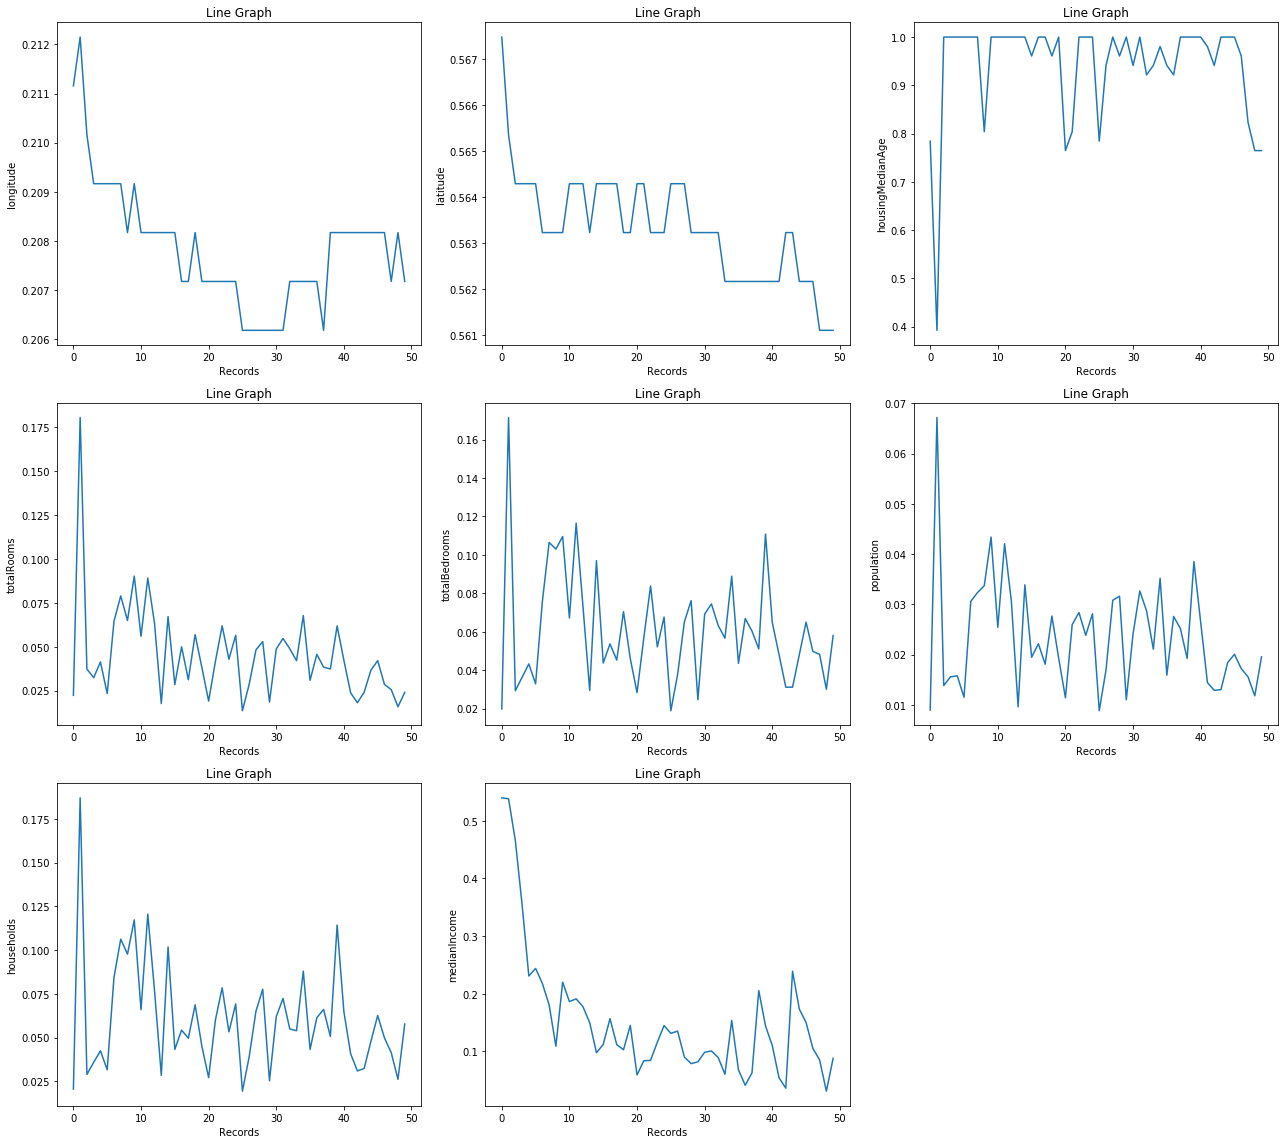

In [43]:
import matplotlib.pyplot as plt
import numpy as np

    # Create the plot object
#_, ax = plt.subplots()
# Plot the data, set the size (s), color and transparency (alpha) of the points
#ax.scatter(f['population'], f['medianHouseValue'], s = 20, color = 'red', alpha = 0.75)
#ax.scatter(f['population'], s = 20, color = 'red', alpha = 0.75)
#if yscale_log == True:
#    ax.set_yscale('log')
#plt.plot(f.iloc[:,3])
# Label the axes and provide a title
#ax.set_title("population")
#ax.set_xlabel("population")
#ax.set_ylabel(y_label)
fig = plt.figure(figsize=(18,16))
for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.plot(f.iloc[:50,i])
    plt.title("Line Graph")
    plt.ylabel(f.columns.values[i])
    plt.xlabel("Records")
    fig.tight_layout()

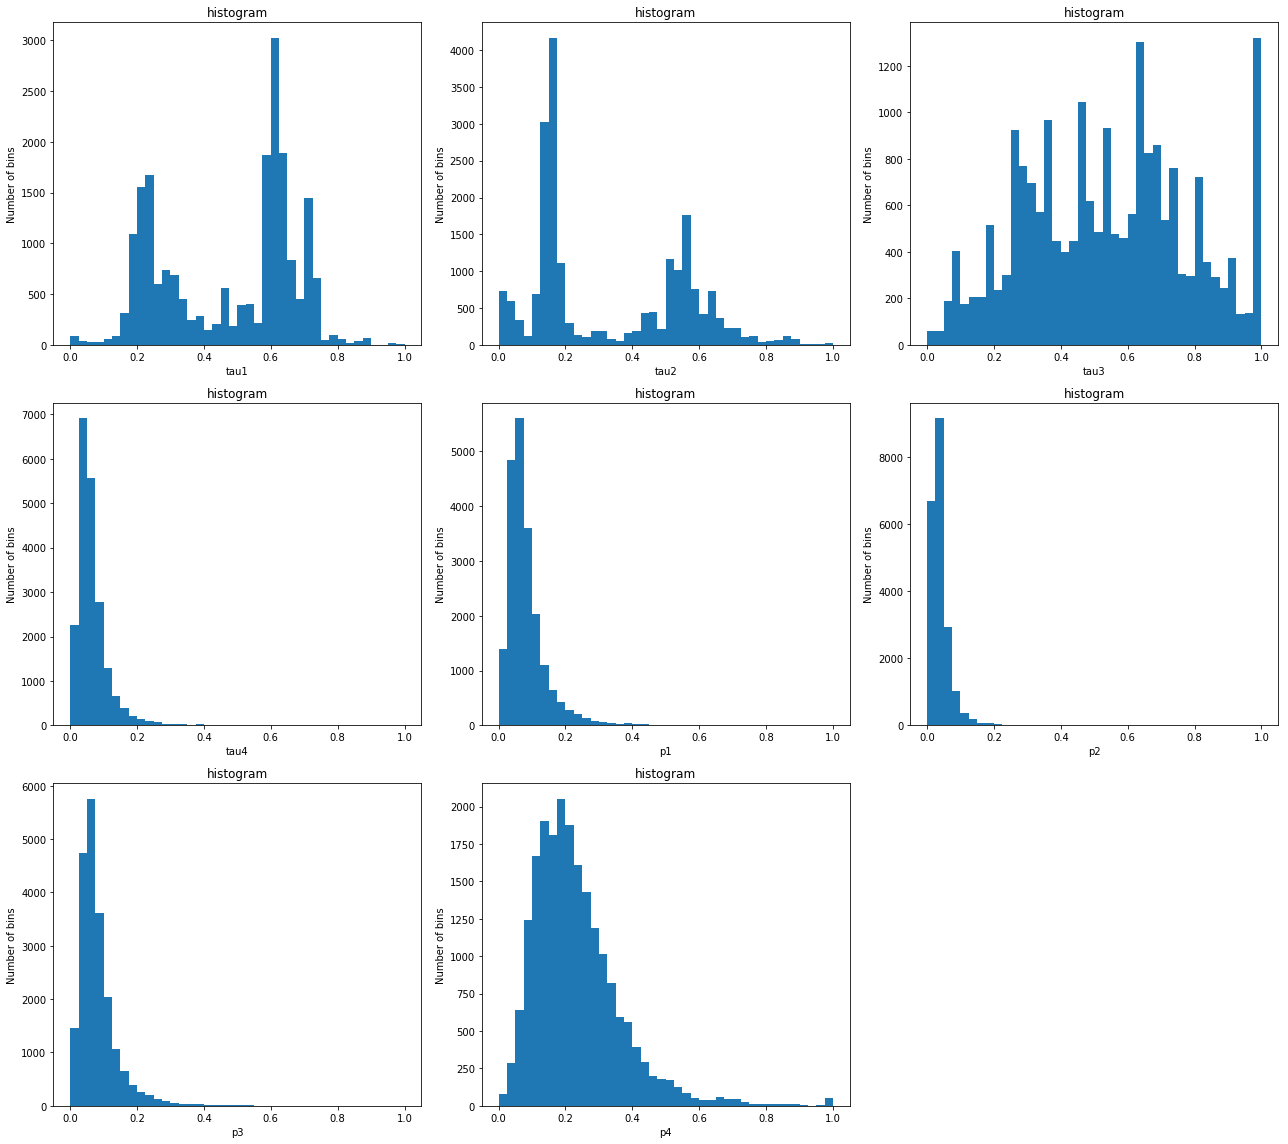

In [41]:
fig = plt.figure(figsize=(18,16))
for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.hist(f.iloc[:,i],40)
    plt.title("histogram")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Number of bins")
    fig.tight_layout()

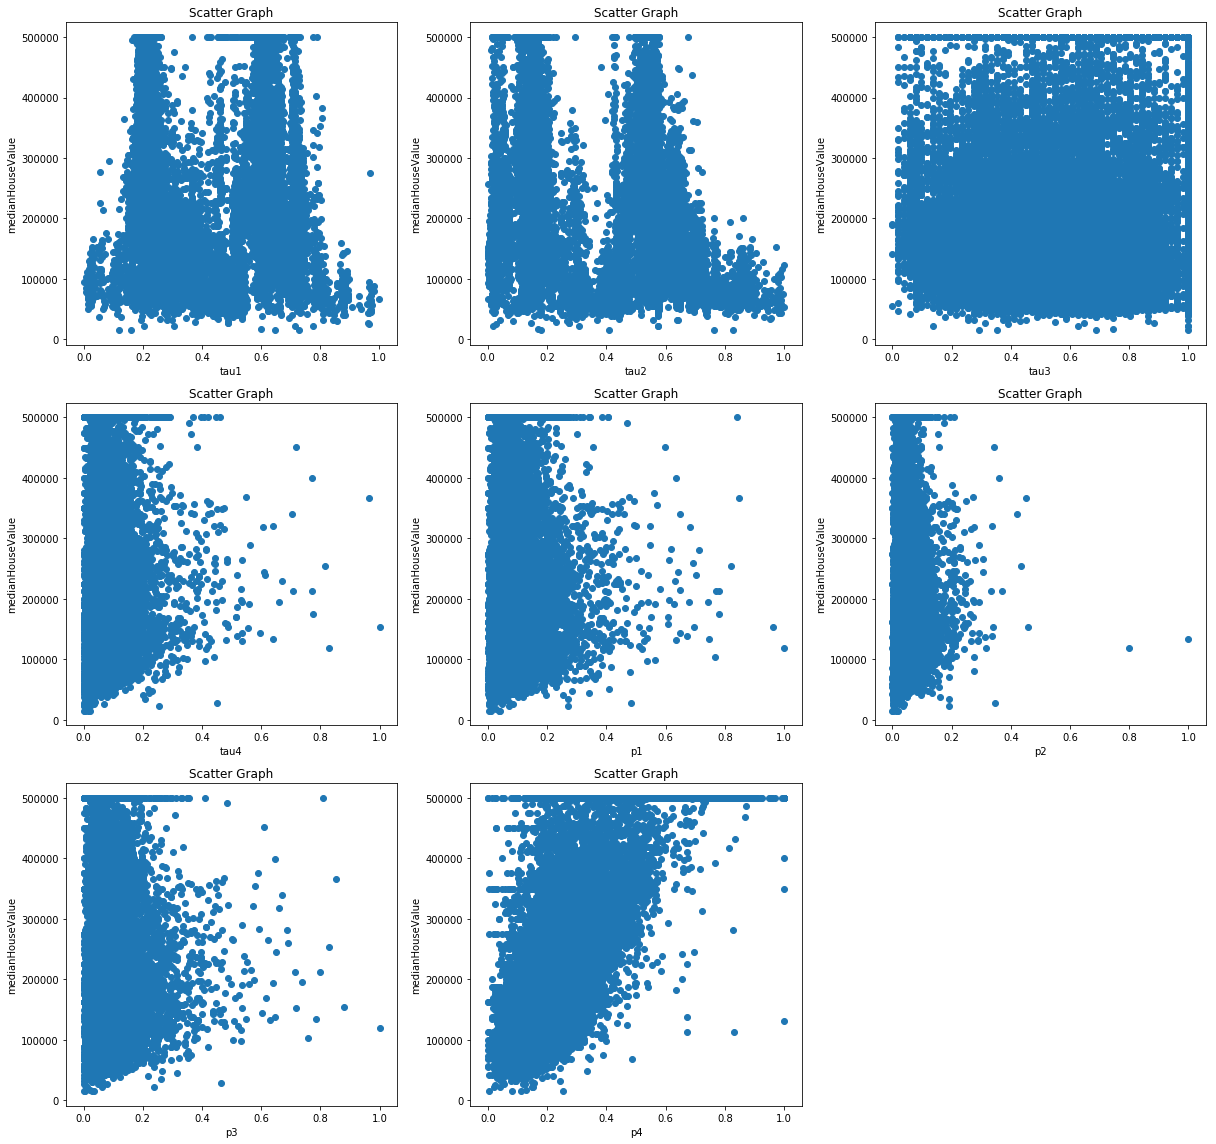

In [45]:
fig = plt.figure(figsize=(17,16))
for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.scatter(f.iloc[:,i], f.loc[:,'medianHouseValue'])
    plt.title("Scatter Graph")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("medianHouseValue")
    fig.tight_layout()

## Preliminary observation

* For doing preprocessing, I have checked for missing values and null values but it doesn't have any of those values. So, data is already preprocessed well.
* I have normalized the data because it will produce more accurate results when we use neural networks.
* From the scatter plot, we can say that most of the data is accumulated at low values and there are few points with higher values for most of the features.

## Introduction of data for Classification & source

* The analysis is performed for different sets of input value for finding the instability in electric grid.  
* Several input values are kept the same: averaging time: 2 s; coupling strength: 8 s^-2; damping: 0.1 s^-1.
* There are 11 predictive attributes, 1 non-predictive(p1), 2 goal fields(stab and stabf) 
* Tau[x] is the reaction time of participant. The value is real from the range [0.5,10]s. 
* p[x] is the nominal power consumed(negative)/produced(positive)(real). 
* For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4) 
* g[x] is the coefficient(gamma) proportional to price elasticity. The value of it is real from the range [0.05,1]s^-1.
* stab is the maximal real part of the characteristic equation root. 
* If the value of it is positive then the system is linearly unstable else it is unstable. 
* stabf is the stability label of the system and is categorical into stable or unstable. 

## Reading the Classification Dataset

In [3]:
import pandas as pd
fc = pd.read_csv("Data_for_UCI_named.csv")
fc.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


## Normalizing the Classification Dataset

In [4]:
for i in range(13):
    max_ = fc.iloc[:,i].max();
    min_ = fc.iloc[:,i].min();
    fc.iloc[:,i] = fc.iloc[:,i].apply(lambda x: ((x-min_)/(max_-min_)))
fc.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,0.258801,0.271561,0.829616,0.976978,0.509244,0.811642,0.495075,0.184572,0.632098,0.852229,0.881531,0.955894,0.715740,unstable
1,0.926793,0.463424,0.268117,0.091471,0.813957,0.039894,0.084809,0.496642,0.382588,0.855215,0.539078,0.770323,0.393359,stable
2,0.891799,0.878795,0.268005,0.075171,0.425652,0.528367,0.481864,0.719670,0.118990,0.754440,0.831000,0.062980,0.442940,unstable
3,0.022700,0.754704,0.419623,0.193715,0.556118,0.648372,0.040670,0.668412,0.417084,0.975576,0.925677,0.329181,0.576507,unstable
4,0.277230,0.748301,0.467747,0.985065,0.453830,0.582991,0.102655,0.963811,0.786481,0.426782,0.638883,0.811553,0.686885,unstable


## Preprocessing the Classification Dataset

### Checking for Null values

In [11]:
import numpy as np
np.any(fc.isnull())

tau1     False
tau2     False
tau3     False
tau4     False
p1       False
p2       False
p3       False
p4       False
g1       False
g2       False
g3       False
g4       False
stab     False
stabf    False
dtype: bool

### Checking for Missing Values

In [12]:
np.any(fc.isna())

tau1     False
tau2     False
tau3     False
tau4     False
p1       False
p2       False
p3       False
p4       False
g1       False
g2       False
g3       False
g4       False
stab     False
stabf    False
dtype: bool

In [13]:
fc.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.499986,0.500001,0.499988,0.500004,0.506188,0.499999,0.500006,0.499984,0.500028,0.500002,0.499982,0.500022,0.507411
std,0.288730,0.288699,0.288730,0.288721,0.175663,0.288732,0.288715,0.288709,0.288712,0.288722,0.288711,0.288719,0.194144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249940,0.250008,0.250007,0.249972,0.382012,0.250029,0.249968,0.249994,0.250032,0.250027,0.249977,0.249990,0.342879
50%,0.499987,0.499999,0.499985,0.499976,0.506428,0.500022,0.500023,0.499979,0.500038,0.500005,0.499997,0.500024,0.514830
75%,0.749988,0.749998,0.750017,0.750014,0.630532,0.750051,0.749998,0.749957,0.749979,0.750020,0.749937,0.749977,0.660687
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualizing the Classification dataset

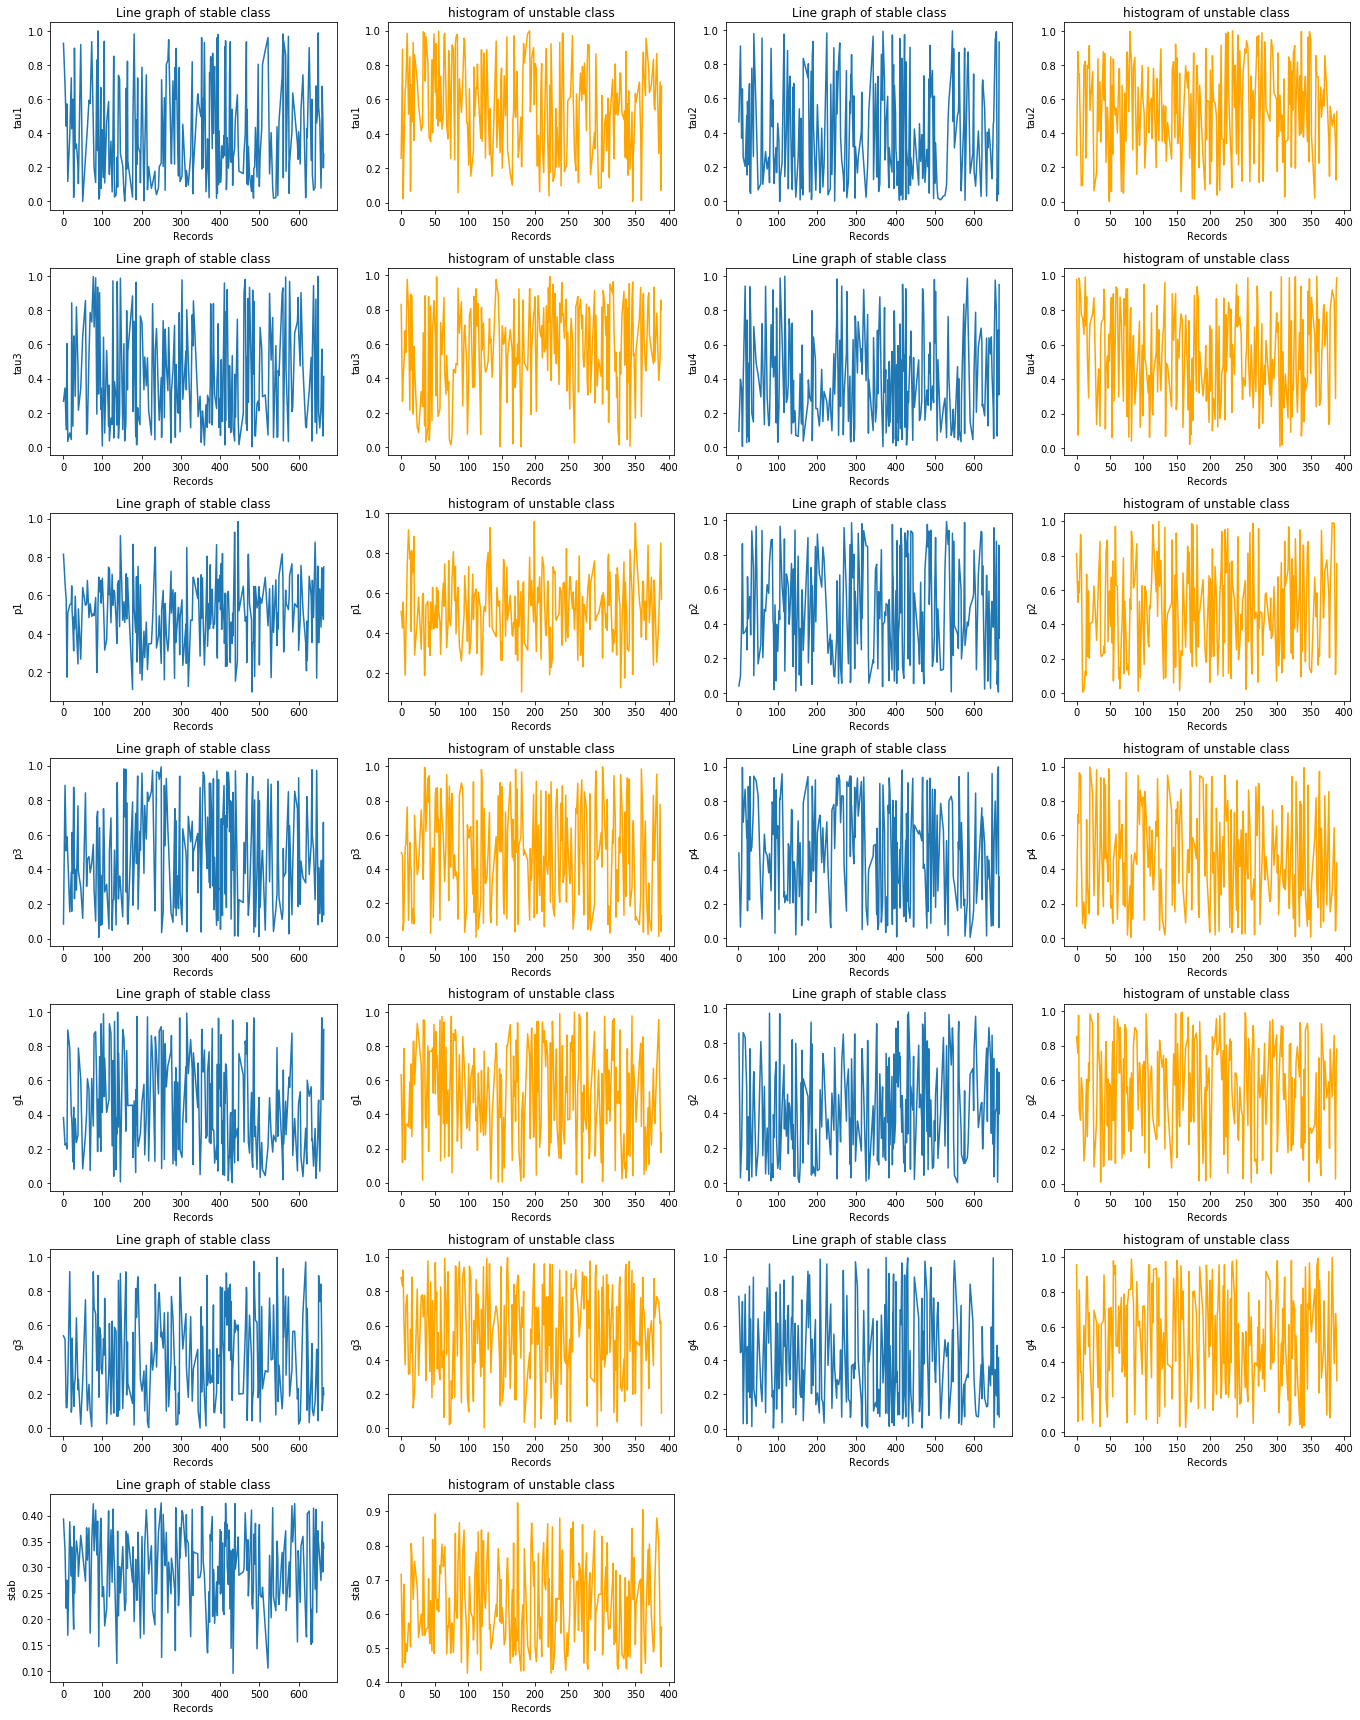

In [49]:
fig = plt.figure(figsize=(19,24))
for i in range(13):
    j = 2*i
    plt.subplot(7, 4, j+1)
    plt.plot(fc[fc.iloc[:,13]=='stable'].iloc[:250,i])
    plt.title("Line graph of stable class")
    plt.ylabel(fc.columns.values[i])
    plt.xlabel("Records")
    fig.tight_layout()
    plt.subplot(7, 4, j+2)
    plt.plot(fc[fc.iloc[:,13]=='unstable'].iloc[:250,i],color = 'orange')
    plt.title("histogram of unstable class")
    plt.ylabel(fc.columns.values[i])
    plt.xlabel("Records")
    fig.tight_layout()

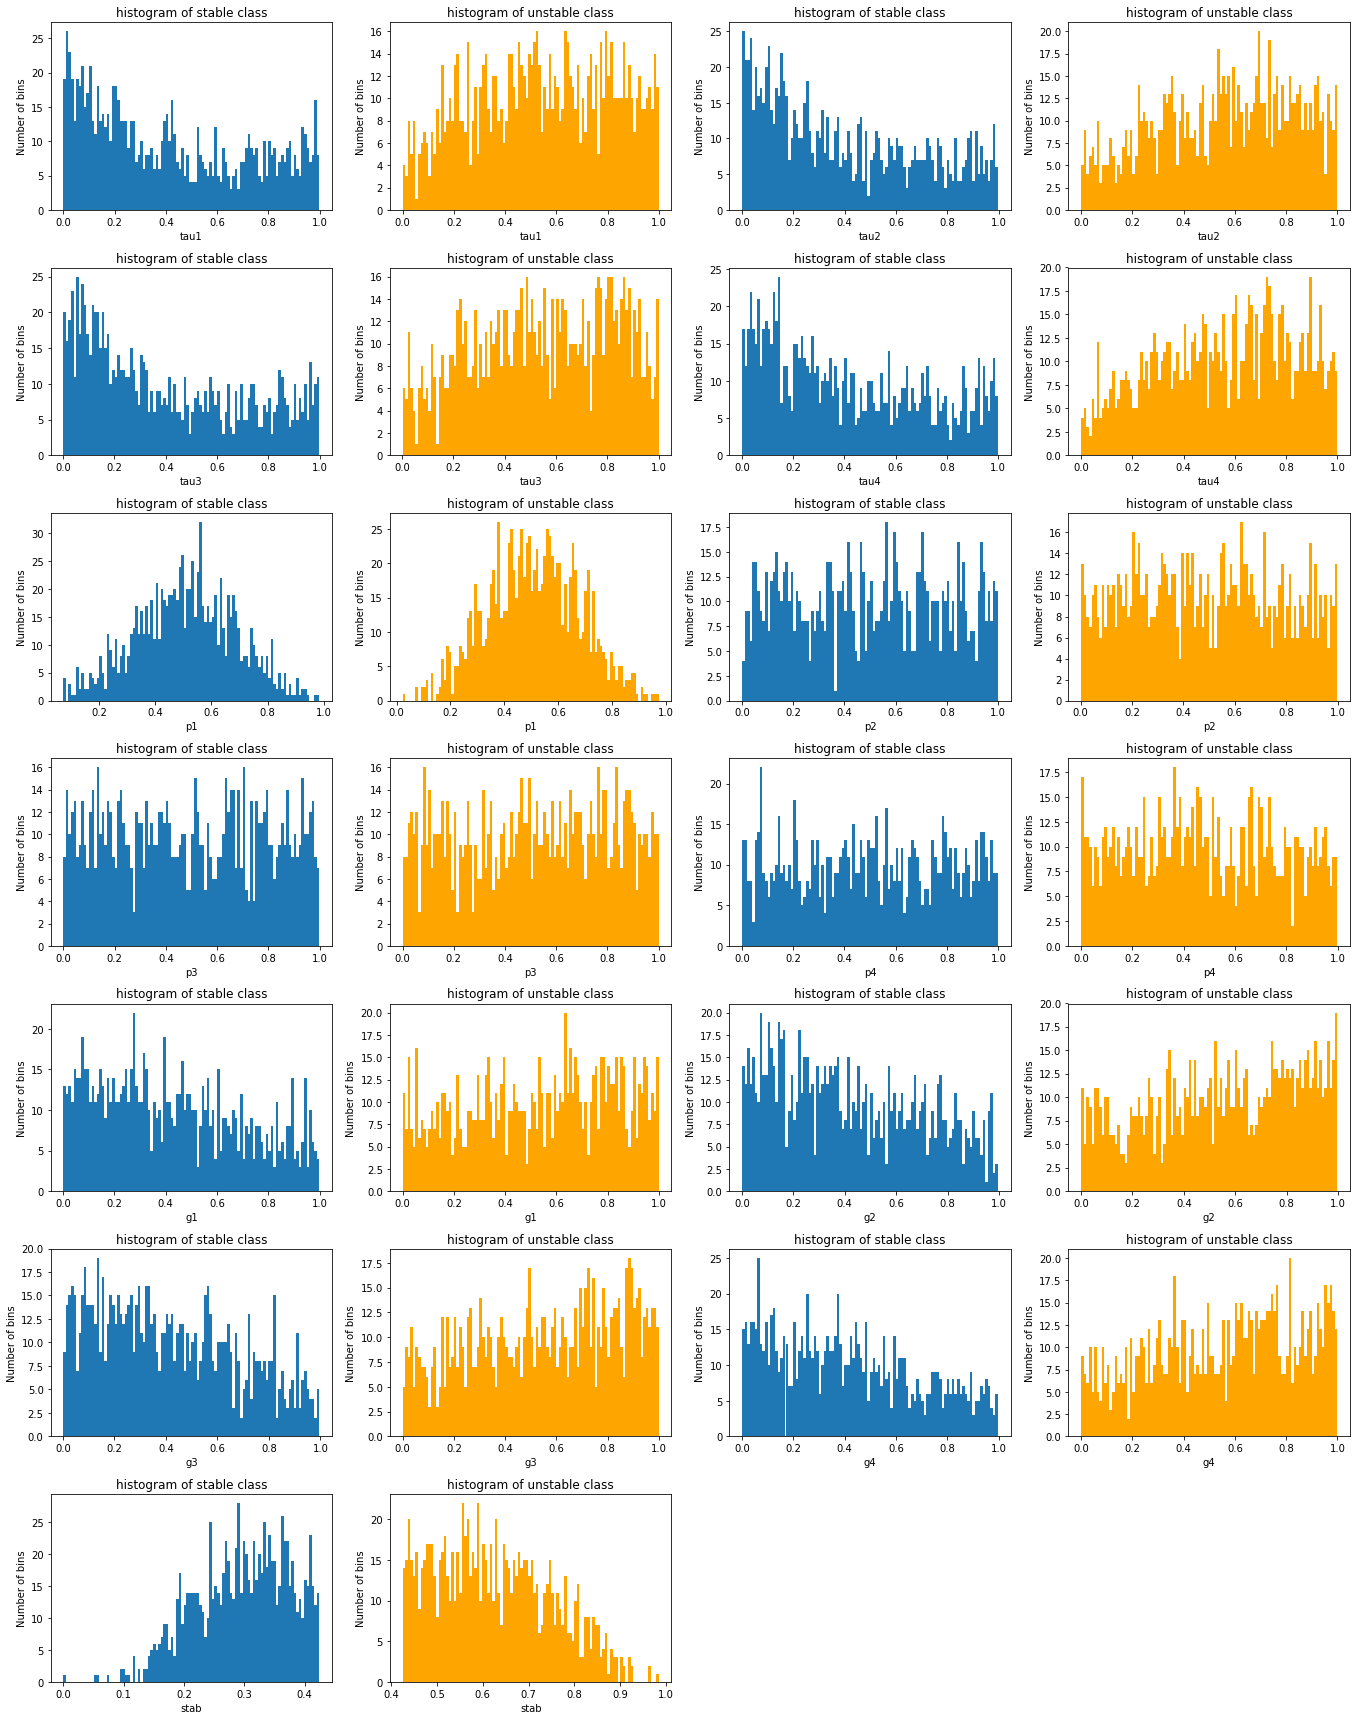

In [46]:
fig = plt.figure(figsize=(19,24))
for i in range(13):
    j = 2*i
    plt.subplot(7, 4, j+1)
    plt.hist(fc[fc.iloc[:,13]=='stable'].iloc[:1000,i],100)
    plt.title("histogram of stable class")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Number of bins")
    fig.tight_layout()
    plt.subplot(7, 4, j+2)
    plt.hist(fc[fc.iloc[:,13]=='unstable'].iloc[:1000,i],100,color = 'orange')
    plt.title("histogram of unstable class")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Number of bins")
    fig.tight_layout()

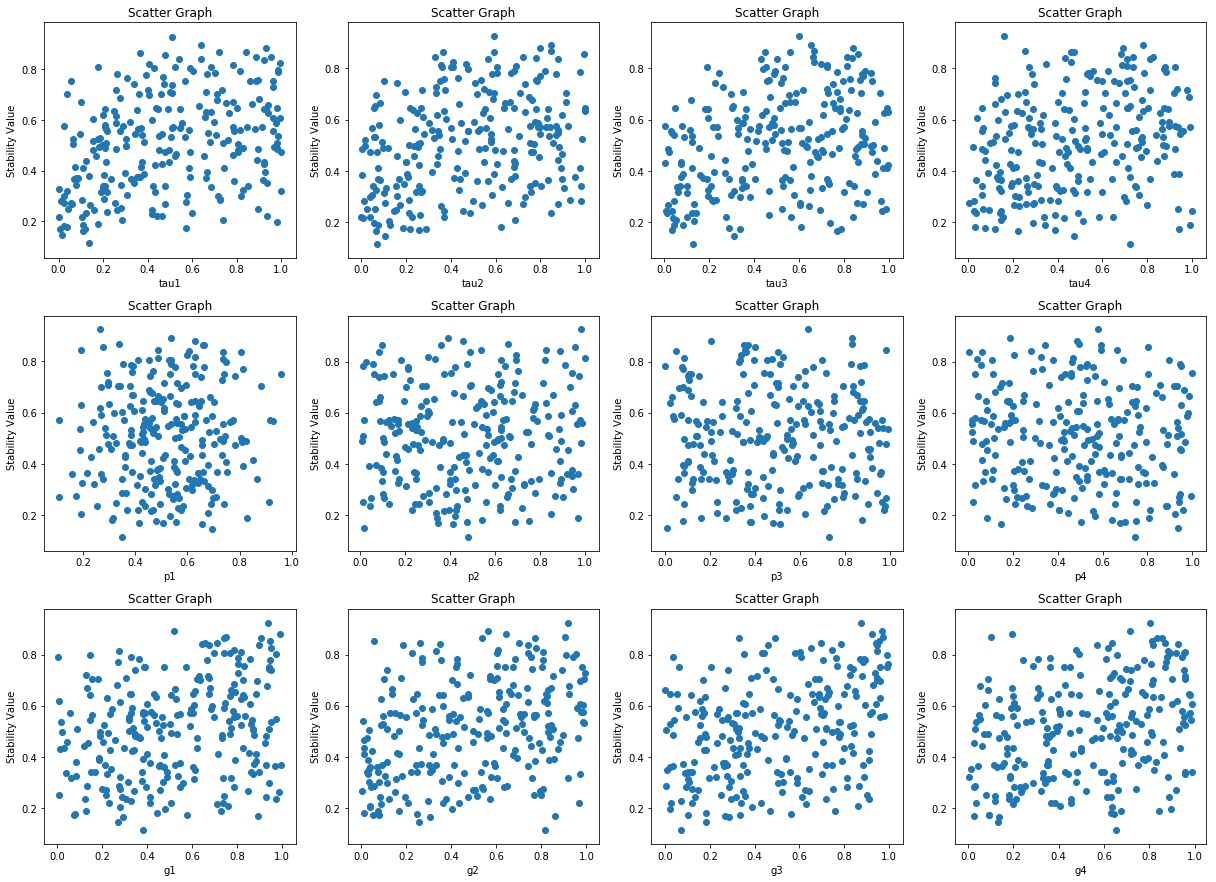

In [30]:
fig = plt.figure(figsize=(17,16))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.scatter(fc.iloc[:250,i], fc.iloc[:250,12])
    plt.title("Scatter Graph")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Stability Value")
    fig.tight_layout()

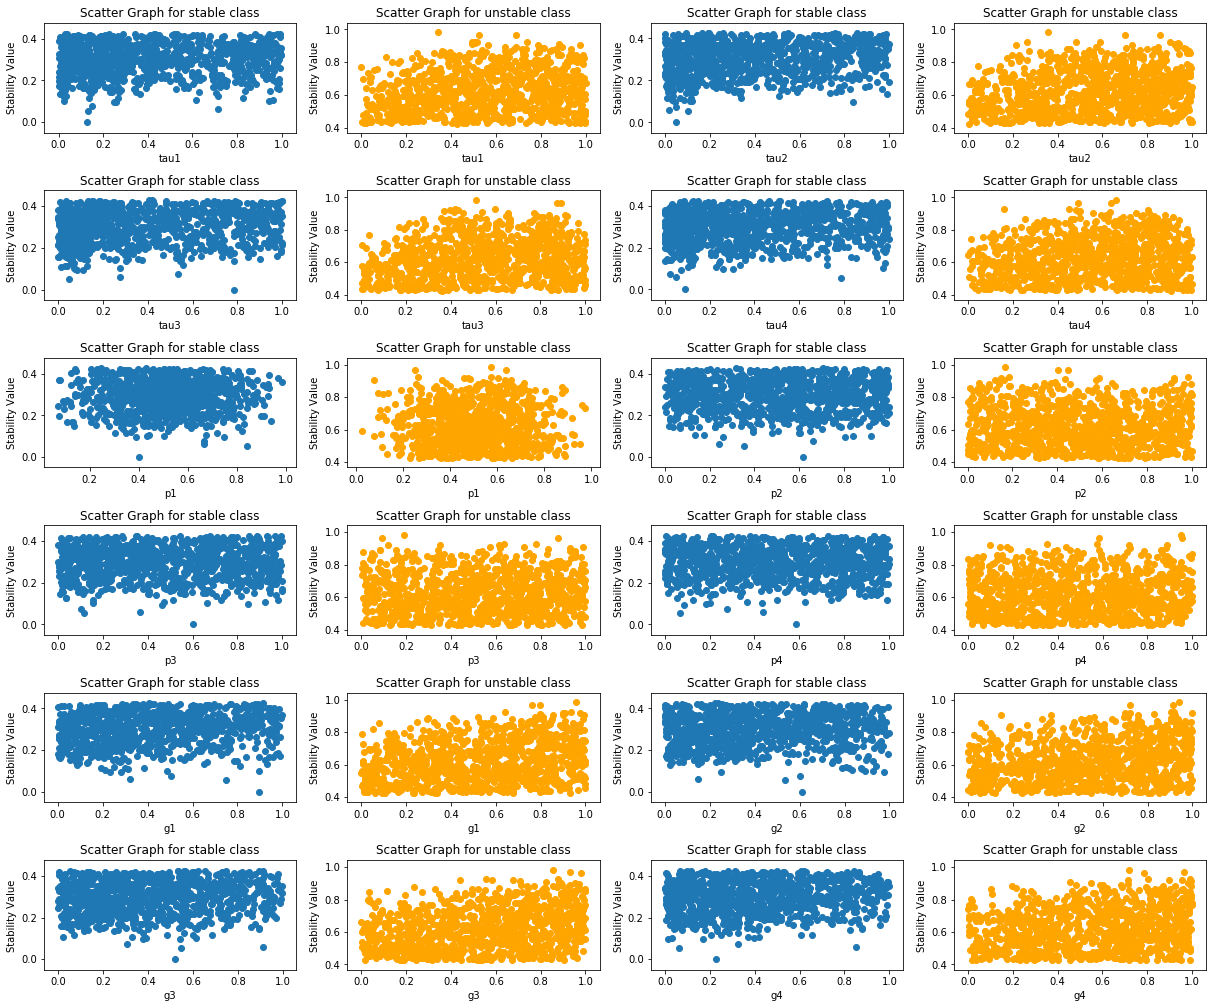

In [50]:
fig = plt.figure(figsize=(17,16))
for i in range(12):
    j = 2*i
    plt.subplot(7, 4, j+1)
    plt.scatter(fc[fc.iloc[:,13]=='stable'].iloc[:1000,i], fc[fc.iloc[:,13]=='stable'].iloc[:1000,12]) 
    plt.title("Scatter Graph for stable class")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Stability Value")
    fig.tight_layout()
    plt.subplot(7, 4, j+2)
    plt.scatter(fc[fc.iloc[:,13]=='unstable'].iloc[:1000,i],fc[fc.iloc[:,13]=='unstable'].iloc[:1000,12],color = 'orange')
    plt.title("Scatter Graph for unstable class")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Stability Value")
    fig.tight_layout()

## Preliminary observation

* As discussed above, there are no null and missing values. So, data is preprocessed well.
* From the plot of histogram, we can clearly observe that for the attributes other than p1,p2,p3,p4 the graph is nearly opposite for stable and unstable class. To explain this clearly, Suppose if we take the value of tau1 parameter between(0,0.1) then number of values in stable class is way more than the unstable. It is nearly opposite graph for stable and unstable.
* If we consider p1,p2,p3,p4 attributes, The graph of stable and unstable classes are similar, so we can give less priority to this feature using regularisation in the feature purpose.
* I have normilized mainly because we can use the activation functions in the future.

# Conclusions

* I came to know the importance of Linear Algebra and Probability Theory in understanding Macjine Learning concepts.
* Learned how to play with pandas, Matplotlab and data.
* Understood the importance of data visulaisation because by plotting the data we can know which feature are important and we can give weightage to particular feature more and less for some features and in the worst scenario we can even even remove the feature.
* Preprocessing the data is important to improve the outcome(Accuracy, Precision and Recall) of our model. After preprocessing we can get to know about our data using some visualisation techniques. In this assignment, I get to know about histogram, Line, Scatter plots.

# References

* http://archive.ics.uci.edu/ml/datasets.html?task=reg
* http://www.cs.toronto.edu/~delve/data/datasets.html
* https://www.kaggle.com/data?sortBy=relevance&group=all&search=classification&page=1&pageSize=20&category=all&kind=all
* https://sci2s.ugr.es/keel/category.php?cat=reg#sub2
* http://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html
* http://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+#